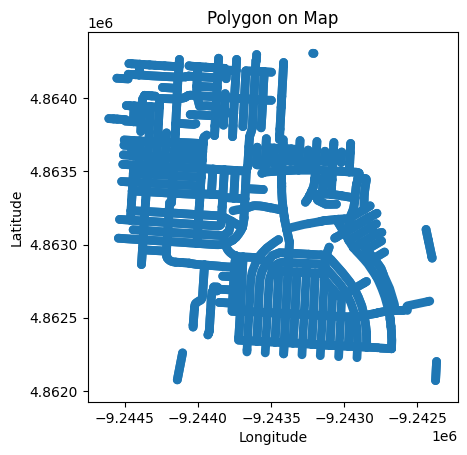

In [17]:
import numpy as np
import pandas as pd
import geopandas
from shapely.geometry import Polygon, Point, LineString
import shapely
import random
import pyproj
import csv
import time
from shapely.strtree import STRtree
import rasterio
from household_constants import(
    income_ranges,
    size_index_dict,
    workers_index_dict
)
from get_census_data import data
import matplotlib.pyplot as plt

housing_areas = []
roads_df = pd.read_csv("roads.csv", low_memory=False)
for index,row in roads_df.iterrows():
    if (isinstance(row["highway"],list)):
        for highway in row["highway"]:
            if (row["highway"] == "residential") or (row["highway"] == "living_street"):
                housing_areas.append(shapely.wkt.loads(row["geometry"]).buffer(30))
    if (row["highway"] == "residential") or (row["highway"] == "living_street") or (row["service"] == "alley"):
        housing_areas.append(shapely.wkt.loads(row["geometry"]).buffer(30))

# Plot the polygon
housing_areas = geopandas.GeoDataFrame(geometry=housing_areas, crs="EPSG:3857")
housing_areas.plot()

# Customize the plot
plt.title('Polygon on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\Charlie\AppData\Local\Programs\Python\Python312\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


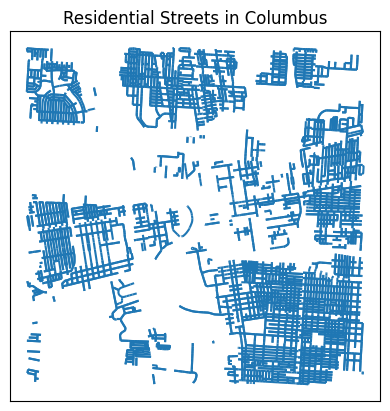

In [30]:
import osmnx as ox

place_name = "Franklin County, Ohio, USA"

#Get road network from open street maps
G = ox.graph_from_point((39.959813,-83.00514),dist=3000, network_type='all',retain_all=True)
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

#convert to epsg:3857
gdf_edges = gdf_edges.to_crs("epsg:3857")

housing_areas = []
roads_df = gdf_edges
for index,row in roads_df.iterrows():
    if (row["highway"] == "residential") or (row["highway"] == "living_street") or (row["service"] == "alley"):
        housing_areas.append(row["geometry"])

# Plot the polygon
housing_areas = geopandas.GeoDataFrame(geometry=housing_areas, crs="EPSG:3857")
housing_areas.plot()

# Customize the plot
plt.title('Residential Streets in Columbus')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('columbus_residential_roads.png', dpi=1000)  # Adjust DPI value as needed
plt.show()